# **ELG 7172B : **: Homework 2 Solutions

##### Solutions are prepared by  Srinavasa Yachitula and Xiaoyan Li with small corrections by Prof. Miodrag Bolic  <br>
**Due: Jan 29, 2018** <br>
Total number of points is 10. Please solve 4 out of 5 problems. <br>
Bonus is additional 5 points. Please do only one of the two bonus questions.

### Instructions:

+ Upload your answers in an ipython notebook to UOttawa Bright Space.

+ Your individual submissions should use the following filenames: ELG_7172B_YOURNAME_HW2.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different format. 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: ELG_7172B_YOURNAME_HW2.tar.gz or ELG_7172B_YOURNAME_HW2.zip



_ _ _ _ _

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 
from scipy import stats

# Problem 1:

Below are some examples of the error models used in instrimentation: 
Quantization with ROUNDING [1]: Use uniform distribution, with resolution a.
For example, if the smallest increment on a scale is 1/8 in, then a = 0.125 in and $\sigma$ = 0.03608 in based on $\sigma=a/\sqrt(12)$. Example is A/D converter where $a=V_{range} / 2^n$ there $n$ is the resolution of A/D converter $V_{range}$ is the range of the voltage at the input of the A/D converter.

Quantization with TRUNCATION [1]
Digital displays often truncate readings: use uniform distribution, with resolution a.
For example, if the smallest digit on a scale represents 0.01 lb, then a = 0.01 lb and $\sigma$ = 0.00577 lb based on $\sigma=a/\sqrt(3)$. Please note that the standard deviation of the error is smaller than in the case of rounding. 

Reference: 
[1] C. Ratcliffe, B. Ratcliffe, Doubt-Free Uncertainty In Measurement, Springer, 2015.

Find at least 3 other probability models used in literature for representing errors of measurements in science and/or engineering that use different distributions from the ones presented above. Show examples and point out to the references. You can use web, papers, books, slides,... Key words could be uncertainty propagation, error distribution, errors in measurements, metrology and errors and so on.  

**Please answer this problem by adding cells here.**
No answer provided.

# Problem 2:
a) Observe the code below. Draw the relationship between the parameter w changing from 0 to 1 and the correlation coefficient. Why does the curve look like that.
b) 
The water level in a particular lake depends on two sources, direct rainfall $X$ and inflow from a stream $Y$. The rainfall $Z$ around the lake can be considered as a random variable
with a mean of $\mu_{z}$ and a standard deviation of $\sigma_{z}$. $X$ and $Y$ are related to $Z$ as 

$ X = a Z $

$ Y = b + c Z $

where a, b and c are constants . X and Y are functions of a random variable and are therefore also random. Calculate the correlation coefficient $\rho_{x,y}$ and simulate this situation in Python by modifying the code below.




Solition: <br>
From $ Z \sim (\mu_{z}, \sigma_{z}^2)$; $ X = a Z $; $ Y = b + c Z $, where a, b and c are constants, we have<br>
\begin{align}
\rho =\frac{cov(X,Y)}{\sigma_X \sigma_Y}= \frac{E[(X - E[X])(Y - E[Y])]}{\sqrt{(E[(X - E[X])^2)E(Y-E[Y])^2)}} = \frac{E[(aZ - a \mu_{Z})((b + cZ)-(b + c \mu_{Z}))]}{ac \sigma_Z^2} = \frac{E[ac(Z-\mu_{Z})^2]}{ac\sigma_Z^2} = \frac{ac Var(Z)}{ac\sigma_Z^2} = 1
\end{align}

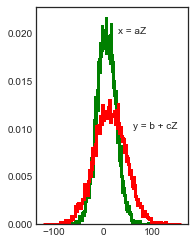

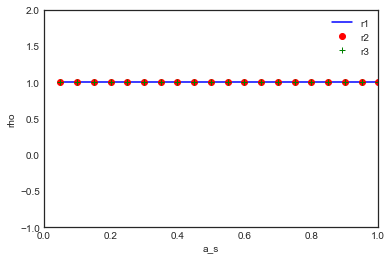

In [34]:
def x_value(a, z):
    return a * z
def y_value(b, c, z ):
    return b + c * z

def get_xy_value(a,b,c,mu,sigma,num_samples=1000):
  
    # Sample a sequence of z and compute x and y.
  
    z = np.random.normal(loc=mu, scale=sigma, size =num_samples)
    x = x_value(a, z)
    y = y_value(b, c, z)
    return x,y
    
def comp_rho(x,y):
    
    # Compute correlation coefficients using three methods.
    
    r1 = np.mean(((x - np.mean(x)) / np.std(x, ddof=1)) * ((y - np.mean(y)) / np.std(y, ddof=1)))
    r2 = np.mean(stats.zscore(y) * stats.zscore(y)) 
    r3, p3 = stats.pearsonr(x, y)
    return r1,r2,r3
    
x,y=get_xy_value(a=3, b=4, c=5, mu=2.0, sigma=6.5, num_samples=10000)
plt.subplot(121)
plt.hist(x, bins = 200, normed = True, color = 'g', histtype = 'step', lw =  3 )
plt.hist(y, bins = 200, normed = True, color = 'r', histtype = 'step', lw =  3 )
plt.text(30, .020,'x = aZ')
plt.text(60, .010, 'y = b + cZ')
plt.show()
# let a change from 0 to 1, while fixing b, c, mu, sigma, compute and plot the corresponding correlation coefficients
a_s=np.arange(0.05,1.05,0.05)
b=4
c=5
mu=2.0
sigma=6.5
coefs1=np.zeros(shape=a_s.shape, dtype=float)
coefs2=np.zeros(shape=a_s.shape, dtype=float)
coefs3=np.zeros(shape=a_s.shape, dtype=float)
for i in range(len(a_s)):
    x,y=get_xy_value(a=a_s[i], b=b, c=c, mu=mu, sigma=sigma)
    r1,r2,r3=comp_rho(x,y)
    coefs1[i]=r1
    coefs2[i]=r2
    coefs3[i]=r3
    
plt.plot(a_s, coefs1, 'b-', label="r1") 
plt.plot(a_s, coefs2, 'ro', label="r2") 
plt.plot(a_s, coefs3, 'g+', label="r3") 
plt.legend()
plt.xlim((0,1))
plt.ylim((-1,2))
plt.xlabel("a_s")
plt.ylabel("rho")
plt.show()      


# Problem 3:
Normal probability calculation: Let X and Y be normal random variables, with $X\sim N(0,1)$ and $Y\sim N(1,4)$. <br>
(a) Find $P(X\leq1.5)$ and $P(X\leq -1)$ (exactly in terms of cumulative density function $\phi$, and in Python).<br>
(b) What is the distribution of $Y-12$? Generate 1000 random numbers in Python of $Y$ and then compute $Y-12$ for each of them and draw histogram. What are the properties of the new distribution what you can observe from the histogram. Please start with the code given below.<br>
(c) Find $P(-1\leq Y\leq 1)$ (exactly in terms of $\phi$, and in Python).<br>



Here is the example code from: https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb
Please modify this code (it is given for the function $y=2x+12$).


### a) $P(X\leq 1.5)$ and $P(X\leq -1) $

$$P(X \leq x)=\phi \left(\frac{x-\mu}{\sigma}\right)$$

we will do the above procedure if the random variable X has normal distribution . But as it is standard normal $X\sim N(0,1)$

$$P(X \leq 1.5)=\phi(1.5)$$

By Z distribution table $\phi(1.5)=0.9332$

$$P(X \leq 1.5)=0.9332$$


$$P(X \leq -1)=1-P(X \leq 1)$$

$$=1-P(X \leq 1)$$

By Z distribution table $\phi(1)=0.8413$

$$=1-0.8413$$

$$P(X \leq -1)= 0.1587$$


### python code for (a)

In [33]:
import numpy as np
from scipy.stats import norm

mean=0                                # mean of x
sd=1                                  # standard deviation of x 
x_1=1.5                               # for X<=1.5
x_2=1                                 # for X<=-1

P_1=norm.cdf(x_1,mean,sd)             # probability of X less than or equal to 1.5
            
P_2=1-norm.cdf(x_2,mean,sd)           #probability of X less than or equal to -1
            
print ('P(X<=1.5) =',P_1) 
print ('P(X<=-1)  =',P_2) 

P(X<=1.5) = 0.933192798731
P(X<=-1)  = 0.158655253931


## (b)
Given Y is normal distribution with $X\sim N(1,4)$

As we know from the Linear function property of the random variable if X is normal distribution then Y=aX+b will also belong to the normal distribution.So the same applies to the Y-12 as it also uses linear function property w.r.t Y.

Some properties of mean and variance

if a is constant and X is a random variable

$$E[X-a]=E[X]-a$$

$$Var[X-a]=a^2 Var[X]$$

By using that property we can say that the Y and Y-12 will have the same variance and mean of Y-12 will be mean of Y minus 12


### python code for (b)


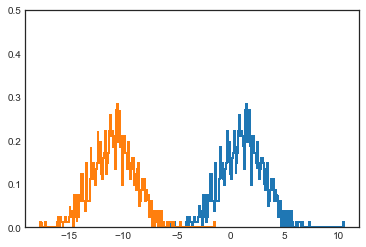

mean = -10.87
variance  = 3.96


In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats


def function(y):                      # creating a function for calculation Y-12 
    return y-12

mean = 1                              # mean of Y 
variance = 4                          # Variance of Y
sd = np.sqrt(variance)                # standard deviation of Y which is square root of variance
y = np.random.normal(mean,sd,1000)    #creating normal distribution with 1000 random variables of Y
y_12 = function(y)                   # transform data through f(Y)=Y-12

plt.hist(y, bins=200, normed=True, histtype='step', lw=2)  # plotting the histogram for y
plt.hist(y_12, bins=200, normed=True, histtype='step', lw=2) # plotting the histogram for x

plt.ylim(0, .5)
plt.show()

print('mean = {:.2f}'.format(y_12.mean()))      # mean from historgram of y-12
print('variance  = {:.2f}'.format(y_12.var()))  # variance from histogram of y-12

From the histogram it it clear that both Y and Y-12 follows normal distribution. So the new distribution is normal distribution

$$E[Y-12]=E[Y]-12$$

$$=1-12$$

$$E[Y-12]=-11$$

$$var(Y-12)=var[Y]$$

$$var(Y-12)=4$$

We can see that the mean and variance of Y-12 from the code is similar to that of calculated answers

The new distribution has mean of $Y-12$ around -11 and variane of $Y-12$ around 4 

## (c)
$$P(\left(-1\leq Y \leq 1\right)) = P(Z \leq \frac{1-1}{2})-P(Z \leq \frac{-1-1}{2})$$

$$=P(Z \leq 0)-P(Z \leq -1)$$

$$=P(Z \leq 0)-(1-P(Z \leq 1))$$

$$=P(Z \leq 0)-1+P(Z \leq 1))$$

$$=\phi({0})+\phi({1})-1 $$

$$=0.5+0.8413-1$$

$$P(\left(-1\leq Y \leq 1\right))=0.3413$$

### python code for (c)

In [37]:
import numpy as np
from scipy.stats import norm

mean=1                                             # mean of Y
sd=2                                            # standard deviation of Y
y1=1                                             # for y<=1     
y2=-1                                           # for y>=-1
P_y=norm.cdf(y1,mean,sd)-(norm.cdf(y2,mean,sd))    #probability of Y between -1 and 1
print ('P(-1 <= Y <= 1) =',P_y) 

P(-1 <= Y <= 1) = 0.341344746069


# Problem 4:
Let X and Y be normal random variables, with X~N(0,1) and Y~N(1,4). Please confirm using simulations (by generating 10,000 numbers) the following formulas: <br>
a) The product of two independent Gaussians is given by:

$$\begin{aligned}\mu &=\mu_1 * \mu_2\\
\sigma^2 &= \sigma^2_1 * \sigma^2_2 + \sigma^2_1 * \mu^2_2 + \sigma^2_2 * \mu^2_1 
\end{aligned}$$

b) The sum of two Gaussians is given by

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

The code should include the following:
- Generation of Gaussian random numbers as in the example from Problem 3.
- Computation of the mean and variance using formulas given above
- Extracting mean and variance from your histogram and comparisson with the results obtained from the formulas given above

product mean from formula 0
product variance from formula 5
product mean from histogram= 0.03
product variance from histogram = 4.92


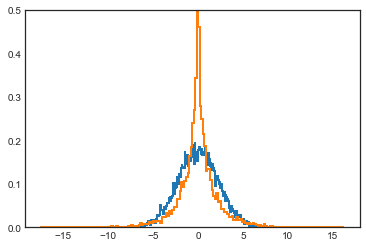

sum mean from formula 1
sum variance from formula 5
sum mean from histogram= 1.02
sum variance from histogram = 4.89


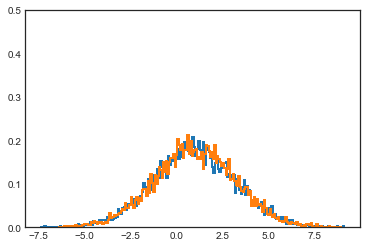

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats


mean_x = 0                                                   # mean of x
var_x=1                                                      # variance of x
std_x = np.sqrt(var_x)                                       # standard deviation of x

mean_y = 1                                                  # mean of y
var_y=4                                                     # variance of y
std_y= np.sqrt(var_y)                                       # standard deviation of y

x = np.random.normal(loc=mean_x, scale=std_x, size=10000)   # creating normal distribution for x with 10,000 samples
y = np.random.normal(loc=mean_y, scale=std_y, size=10000)   # creating normal distribution for y with 10,000 samples
sum=x+y                                                     # X+Y distribution
product=x*y                                                 # XY distribution

#a

#mean_pf=(mean_x*var_y+mean_y*var_x)/(var_x+var_y)           # mean formula for product from the question
#var_pf= (var_x*var_y)/(var_x+var_y)
mean_pf=(mean_x*mean_y)
var_pf=var_x*var_y + var_x*mean_y**2+ var_y*mean_x**2
std_pf=np.sqrt(var_pf)
print('product mean from formula',mean_pf)
print('product variance from formula',var_pf) 

product_pf = np.random.normal(loc=mean_pf, scale=std_pf, size=10000)
plt.hist(product_pf, bins=200, normed=True, histtype='step', lw=2)   


plt.hist(product, bins=200, normed=True, histtype='step', lw=2)       # plotting the histogram for XY distribution manually
print('product mean from histogram= {:.2f}'.format(product.mean()))   # finding the value of mean from histogram of XY distribution
print('product variance from histogram = {:.2f}'.format(product.var())) # finding the value of variance from histogram of XY distribution

plt.ylim(0, 0.5)
plt.show()


#b

mean_sf=mean_x+mean_y                                   # mean formula for sum from the question
var_sf=var_x+var_y                                      # variance formula for sum the question                          
std_sf=np.sqrt(var_sf)

print('sum mean from formula',mean_sf)
print('sum variance from formula',var_sf)
sum_pf = np.random.normal(loc=mean_sf, scale=std_sf, size=10000) 
plt.hist(sum_pf, bins=200, normed=True, histtype='step', lw=2)


plt.hist(sum, bins=200, normed=True, histtype='step', lw=2)     # plotting the histogram for X+Y distribution manually
print('sum mean from histogram= {:.2f}'.format(sum.mean()))     # finding the value of mean from histogram of X+Y distribution
print('sum variance from histogram = {:.2f}'.format(sum.var())) # finding the value of variance from histogram of X+Y distribution



plt.ylim(0, 0.5)
plt.show()



# Problem 5:
Let us consider a model where $x = x_t +e_x$, where $e_x$ is a random error
term (i.e. has mean 0 and variance 1). That is, $x_t$ is the �true� value of the variable, and $x$ is the measure of the variable that is observed. The same model is used for the measurement of y, $y=y_t+e_y$, where $e_y$  is a random error term (i.e. has mean 0 and variance 1). 

A) Create data in Python (1000 points of x and y) that has the following properties
$$\Sigma = \begin{bmatrix}2&0.7\\0.7&\sqrt(8)\end{bmatrix}$$
$mean_x = 10$, $mean_y=7$, both $e_x$ and $e_y$ are standard Normal.
using: $y= y_t + e_y$ and $x = x_t + e_x$.

B) Compute mean and variance of x and y. What is the effect of the error term on the mean and variance of x and y.

C) Compute the following covariances in Python: $cov (x, y_t)$ and $cov (x_t, y_t)$. From the lecture, you know how to compute, for example, $cov(x_t + e_x, y_t)$. Compare obtained result with the formulas from the lectures.

D) Find the correlation coeeficient in Python.



## Python code 

In [38]:
import numpy as np
from scipy import stats 
import statistics
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


mean_xt_yt=[10,7]       # mean of true value
cov_xt_yt=[[2,0.7],[0.7,2.82]]    # covariance of true value

# A 
xt,yt=np.random.multivariate_normal(mean_xt_yt,cov_xt_yt,1000).T    # multivariate normal distribution distribution with 1000 samples

# B

ex=np.random.normal(0,1,1000)  # normal distribution of random error term of x with 1000 samples given N(0,1)
ey=np.random.normal(0,1,1000)  # normal distribution of random error term of y with 1000 samples given N(0,1)

x=xt+ex        # given 
y=yt+ey        # given

mean_x=np.mean(x)          # mean of x
print('mean of x is' ,mean_x) 
mean_y=np.mean(y)          # mean of y
print('mean of y is' ,mean_y)
var_x=np.var(x)            # variance of x
print('variance of x is' ,var_x)
var_y=np.var(y)            # variance of y
print('variance of y is' ,var_y)

var_xt=cov_xt_yt[0][0]   # variance of xt
var_yt=cov_xt_yt[1][1]   # variance of yt

mean_xt=mean_xt_yt[0]    # mean of xt
mean_yt=mean_xt_yt[1]    # mean of yt




mean_effect_x=mean_x-mean_xt
mean_effect_y=mean_y-mean_yt
variance_effect_x=var_x-var_xt
variance_effect_y=var_y-var_yt

print('The effect of error term on the mean of x is ',mean_effect_x)
print('The effect of error term on the mean of y is ',mean_effect_y)
print('The effect of error term on the variance of x is ',variance_effect_x)
print('The effect of error term on the variance of y is ',variance_effect_y)


# C

cov_1=np.cov(x,yt)      # covariance of x and yt
print('covariance of x and yt is',cov_1[0][1])
cov_2=np.cov(xt,yt)     # covariance of xt and yt
print('covariance of xt and yt is',cov_2[0][1])

# D

r3,p3=stats.pearsonr(x,y)   # correlation coefficient
print('The correlation coefficient is ', r3)

mean of x is 9.96048711797
mean of y is 6.93610819349
variance of x is 3.09838239177
variance of y is 3.76131383685
The effect of error term on the mean of x is  -0.0395128820282
The effect of error term on the mean of y is  -0.0638918065067
The effect of error term on the variance of x is  1.09838239177
The effect of error term on the variance of y is  0.94131383685
covariance of x and yt is 0.584731997294
covariance of xt and yt is 0.62039953721
The correlation coefficient is  0.191729701285


From the ouput we can see that the effect of error term on the mean of x and y is 0 as the mean of error term is 0.
The effect of error term on the variance of x and y is approximately equal to +1 as the variance of error term is 1.
As we know if we add any gaussian with zero mean the actual mean of the distribution won't shift, if we add any gaussian with specific variance 'a' then the actual variance of the distribution shifts by 'a'

# Bonus problems 

### Bonus problem 1: 
Instead of solving problems using scipy.stats use one of these 2 Python tools: OpenTurns http://openturns.github.io/openturns/master/contents.html or Pyro (for those interested in PyTorch) http://docs.pyro.ai/primitive_dist.html 

### Bonus problem 2: 
Implement the following problem in Python by simulating multivariate normal and solve analytically. To generate multivariate Gaussian random numbers please use the code below from http://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html

 Let $X=(X_1,X_2,X_3)^T$ have N(µ, Σ) distribution where $µ = (0, 0, 0)^T$  and
$$\Sigma = \begin{bmatrix}1&-2&0\\-2&5&0\\0&0&2\end{bmatrix}$$

Find the joint distribution of the following pairs of random variables. Are they independently distributed? Provide explanations for your answers.<br>
(i) $X_1$ and $X_2$. <br>
(ii) $X_2$ and $X_3$. <br>
(iii) ($X_1$, $X_2$) and $X_3$. <br>
(iv) ($X_1$ + $X_2$)/2 and $X_3$. <br>
(v) $X_2$ and $-2.5X_1 + X_2 - X_3$. <br>

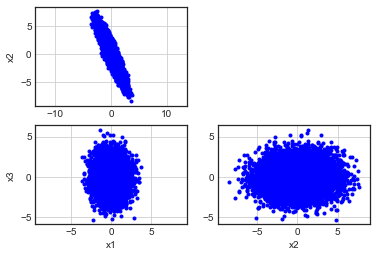

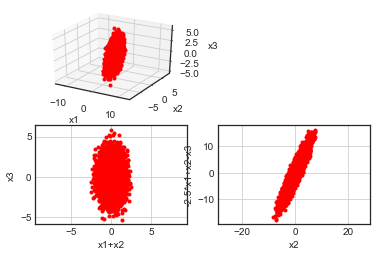

In [39]:
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'
num_samples = 10000
# The desired covariance matrix.
r = np.array([
    [ 1, -2, 0],
    [ -2, 5, 0],
    [ 0,  0, 2]
    ])
# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
y = norm.rvs(size=(3, num_samples))
# We need a matrix `c` for which `c*c^T = r`. We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.
if method == 'cholesky':
# Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
# Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables.
x = np.dot(c, y)

# Plot various projections of the samples.

subplot(2,2,1)
plot(x[0], x[1], 'b.')
ylabel('x2')
axis('equal')
grid(True)

subplot(2,2,3)
plot(x[0], x[2], 'b.')
xlabel('x1')
ylabel('x3')
axis('equal')
grid(True)

subplot(2,2,4)
plot(x[1], x[2], 'b.')
xlabel('x2')
axis('equal')
grid(True)
show()


ax=subplot(221,projection='3d')
ax.plot(x[0], x[1], x[2], 'r.')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
axis('equal')
grid(True)

subplot(2,2,3)
plot(0.5*(x[0]+x[1]), x[2], 'r.')
xlabel('x1+x2')
ylabel('x3')
axis('equal')
grid(True)

subplot(2,2,4)
plot(x[1], -2.5*x[0]+x[1]-x[2], 'r.')
xlabel('x2')
ylabel('-2.5*x1+x2-x3')
axis('equal')
grid(True)
show()

(i): $f(x_1, x_2) = N(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}1&-2\\-2&5\end{bmatrix})$. $x_1$ and $x_2$ are not independent, because their covariance is not zero.

(ii): $f(x_2, x_3) = N(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}5&0\\0&2\end{bmatrix})=N(0,5)N(0,2)=f(x_2)f(x_3)$. Thus, $x_2$ and $x_3$ are indenpendent.

(iii) $f((x_1,x_2),x_3)=f(x_1,x_2,x_3)=f(x_1,x_2)f(x_3)$. $(x_1,x_2)$ is independent of $x_3$.

(iv) $E[\frac{x_1+x_2}{2}]=\frac{1}{2}E[x_1+x_2]=\frac{1}{2}(E[x_1]+E[x_2])=0$,<br>
$E[x_3]=0$,<br>
$var(\frac{x_1+x_2}{2})=\frac{1}{4}(var(x_1+x_2))=\frac{1}{4}[var(x_1)+var(x_2)+2cov(x_1,x_2)]=\frac{1}{4}[1+5-4]=\frac{1}{2}$,<br>
$var(x_3)=2$,<br>
$cov(\frac{x_1+x_2}{2},x_3)=\frac{1}{2}cov(x_1+x_2,x_3)=\frac{1}{2}(cov(x_1,x_3)+cov(x_2,x_3))=\frac{1}{2}(0+0)=0$.<br>
Thus,<br>
$f(\frac{x_1+x_2}{2},x_3)=N(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}\frac{1}{2} & 0\\0&2\end{bmatrix})$. $\frac{x_1+x_2}{2}$ and $x_3$ are independent, because their covariance is 0.

(v) 
\begin{align}
var(-2.5x_1+x_2-x_3)&=(-2.5)^2var(x_1)+var(x_2)+(-1)^2var(x_3) + cov(-2.5x_1,x_2) + cov(-2.5x_1,x_3) + cov(x_2,-x_3)\\
&=6.25var(x_1)+var(x_2)+var(x_3) -2.5cov(x_1,x_2) -2.5cov(x_1,x_3) - cov(x_2,x_3)\\
&=6.25 + 5 + 2 -2.5*(-2) - 2.5*0 - 0\\
&=18.25,
\end{align}

\begin{align}
cov(x_2, -2.5x_1 + x_2 -x_3)&=cov(x_2,-2.5x_1) + cov(x_2,x_2) + cov(x_2,-x_3)\\
&=-2.5*cov(x_2,x_1) + var(x_2) - cov(x_2,x_3)\\
&=-2.5*(-2) + 5 - 0\\
&=5+5\\
&=10.
\end{align}

Thus, $f(x_2, -2.5x_1 + x_2 -x_3)=N(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}5 & 10\\10&18.25\end{bmatrix})$. $x_2$ and $-2.5x_1 + x_2 -x_3$ are not independent, as their covariance is nonzero.